In [3]:
import matplotlib.pyplot as plt
from scipy.stats import skew
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df_data=pd.read_csv('city_day.csv',parse_dates=['Date'])
df_data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,UTTAR_PD,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,UTTAR_PD,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,UTTAR_PD,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,UTTAR_PD,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,UTTAR_PD,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,UTTAR_PD,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,UTTAR_PD,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,UTTAR_PD,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,UTTAR_PD,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,UTTAR_PD,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [5]:
df_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
mis_data=pd.DataFrame(df_data.isna().sum()/len(df_data))
mis_data.columns=['Proportion']
mis_data=mis_data.sort_values(by='Proportion',ascending=False)

In [7]:
df_data.interpolate(limit_direction="both",inplace=True)
df_data.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

<AxesSubplot:xlabel='AQI', ylabel='City'>

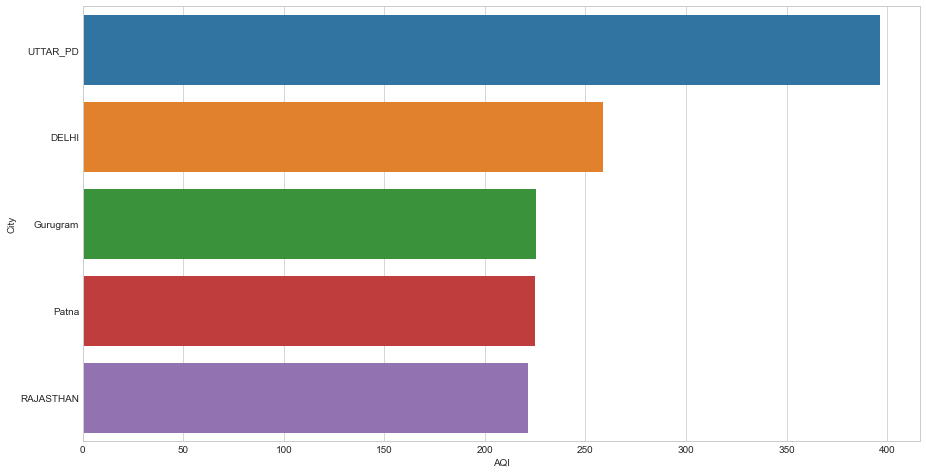

In [8]:
val=pd.DataFrame(df_data.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head())
val=val.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,8))
sns.barplot(data=val,x='AQI',y='City')

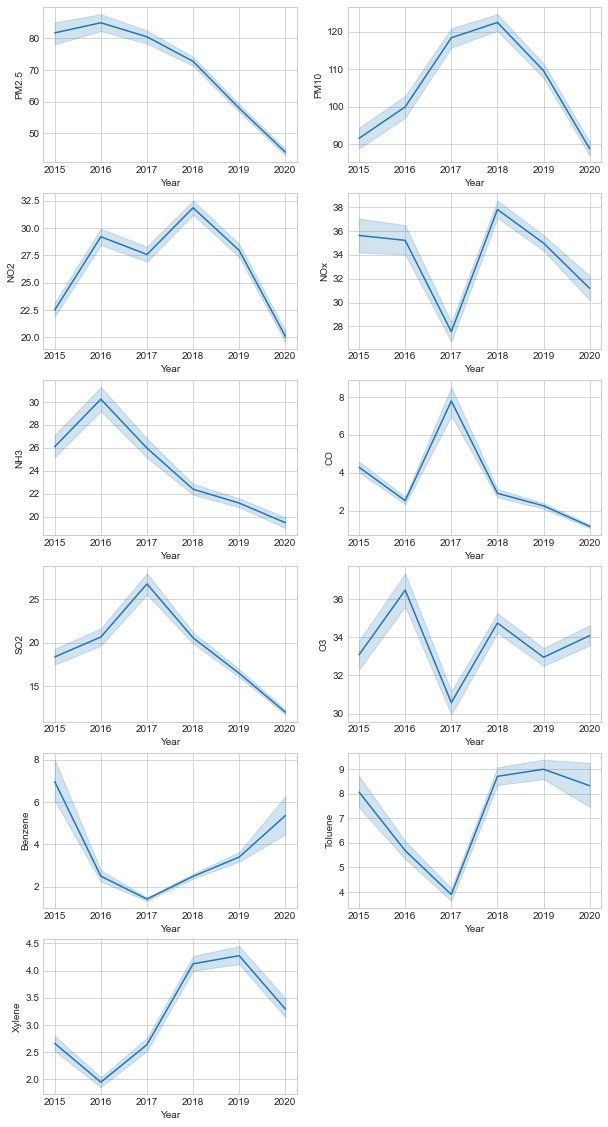

In [9]:
df_data['Month']=df_data.Date.dt.month.astype(str)
df_data['Year']=df_data.Date.dt.year.astype(str)
feat=['PM2.5','PM10','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

val=df_data.iloc[:,2:]
fg=plt.figure(figsize=(10,20))
for i,j in enumerate(feat):
    fg.add_subplot(6,2,i+1)
    sns.lineplot(data=val,x='Year',y=j)

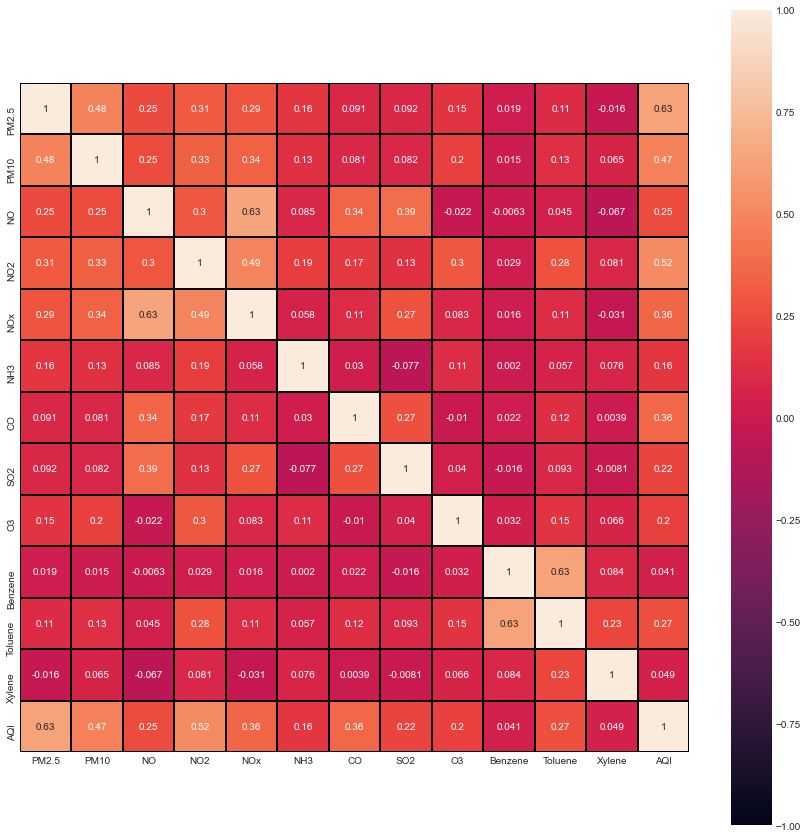

In [10]:
figs=plt.gcf()
figs.set_size_inches(15,15)
figs=sns.heatmap(df_data.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


<AxesSubplot:xlabel='Month', ylabel='AQI'>

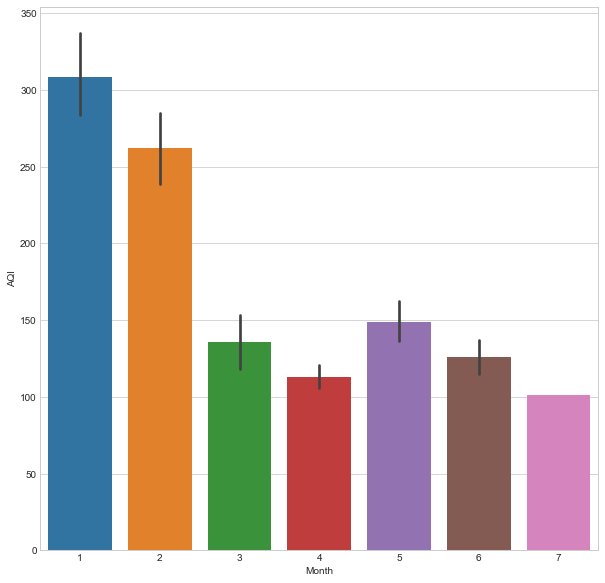

In [11]:
val=df_data[(df_data['City']=='DELHI') & (df_data['Year']=='2020')]

plt.figure(figsize=(10,10))
sns.barplot(data=val,x='Month',y='AQI')

In [12]:
max_p = df_data[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
print(max_p)

                           AQI        PM10         CO
City                                                 
UTTAR_PD            396.402937  136.079821  32.926710
DELHI               258.621453  231.098382   1.976053
Gurugram            225.563133  198.285628   1.249720
Patna               225.154467   89.004532   1.431060
RAJASTHAN           221.298407   39.988802   2.127914
Talcher             164.714595  158.110535   1.925692
Brajrajnagar        151.867068  130.138086   1.739408
Jorapokhar          147.219846  149.159029   0.747066
Guwahati            139.604582  116.604900   0.735388
Kolkata             137.125921  110.105584   0.799251
Jaipur              133.092908  123.058945   0.799039
Bhopal              130.404844  117.439014   0.861073
Amritsar            122.391073  116.650192   0.555299
TAMIL_NADU          118.286959   61.699477   1.068118
Visakhapatnam       117.518810  100.620869   0.737986
ANDHRA_PD           107.716351   87.742722   0.590366
Kochi               104.1944

In [13]:
df_data['year'] = pd.DatetimeIndex(df_data['Date']).year
df_data['month'] = pd.DatetimeIndex(df_data['Date']).month

air = pd.DataFrame()
for i in range(2015,2020):
    k=df_data[df_data['year']==i]
    kl = k[['City', 'AQI']].groupby(['City']).mean()
    air[str(i)] = kl['AQI']
print(air)

                   2015        2016        2017        2018        2019
City                                                                   
ANDHRA_PD    127.690608  121.851093  112.439726   97.556164   93.980822
DELHI        297.024658  301.035519  252.247945  249.158904  232.104110
Gurugram     139.241379  227.199595  287.952055  233.795890  195.123288
KARNATAKA    106.497260  104.532787   87.149315   86.419178   91.602740
MAHARASHTRA   75.551104   74.654538   73.757972   92.953771  107.950685
Patna        201.789720  248.229508  246.239726  234.510959  216.810959
RAJASTHAN    228.545205  235.146175  238.602740  233.772603  202.561644
TAMIL_NADU   161.479452  136.199454  104.343836  105.490411  102.942466
UTTAR_PD     308.276013  323.836867  283.153320  622.550685  519.804110


In [14]:
s = pd.DataFrame()
for i in range(2015,2020):
    k=df_data[df_data['year']==i]
    kl = k[['City', 'CO']].groupby(['City']).mean()
    s[str(i)] = kl['CO']
print(s)

                  2015       2016       2017       2018       2019
City                                                              
ANDHRA_PD     0.748287   0.821107   0.254301   0.621726   0.570110
DELHI         5.255151   1.610082   0.697753   1.407068   1.371616
Gurugram      1.534000   1.406352   1.828342   0.894329   0.903753
KARNATAKA     5.482808   1.301858   1.052904   0.945671   0.901753
MAHARASHTRA   0.000000   0.000000   0.000000   1.575260   1.271740
Patna         1.812500   1.684317   0.877137   1.529671   1.558055
RAJASTHAN     4.961534   2.145984   1.725726   1.042603   1.230411
TAMIL_NADU    2.380151   1.129003   0.220877   0.870411   0.864027
UTTAR_PD     12.862882  13.326556  91.218036  33.369493  25.995068
